In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_covid19 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")
df_table = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv",parse_dates=['Last_Update'])

In [3]:
df_covid19 = df_covid19.drop(["People_Tested","People_Hospitalized","UID","ISO3","Mortality_Rate"],axis =1)

In [4]:
df_confirmed = df_confirmed.rename(columns={"Province/State":"state","Country/Region": "country"})
df_deaths = df_deaths.rename(columns={"Province/State":"state","Country/Region": "country"})
df_covid19 = df_covid19.rename(columns={"Country_Region": "country"})
df_covid19["Active"] = df_covid19["Confirmed"]-df_covid19["Recovered"]-df_covid19["Deaths"]

In [5]:
# Changing the country names as required by pycountry_convert Lib
df_confirmed.loc[df_confirmed['country'] == "US", "country"] = "USA"
df_deaths.loc[df_deaths['country'] == "US", "country"] = "USA"
df_covid19.loc[df_covid19['country'] == "US", "country"] = "USA"
df_table.loc[df_table['Country_Region'] == "US", "Country_Region"] = "USA"

df_confirmed.loc[df_confirmed['country'] == 'Korea, South', "country"] = 'South Korea'
df_deaths.loc[df_deaths['country'] == 'Korea, South', "country"] = 'South Korea'
df_covid19.loc[df_covid19['country'] == "Korea, South", "country"] = "South Korea"
df_table.loc[df_table['Country_Region'] == "Korea, South", "Country_Region"] = "South Korea"

df_confirmed.loc[df_confirmed['country'] == 'Taiwan*', "country"] = 'Taiwan'
df_deaths.loc[df_deaths['country'] == 'Taiwan*', "country"] = 'Taiwan'
df_covid19.loc[df_covid19['country'] == "Taiwan*", "country"] = "Taiwan"
df_table.loc[df_table['Country_Region'] == "Taiwan*", "Country_Region"] = "Taiwan"

df_confirmed.loc[df_confirmed['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'
df_deaths.loc[df_deaths['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'
df_covid19.loc[df_covid19['country'] == "Congo (Kinshasa)", "country"] = "Democratic Republic of the Congo"
df_table.loc[df_table['Country_Region'] == "Congo (Kinshasa)", "Country_Region"] = "Democratic Republic of the Congo"

df_confirmed.loc[df_confirmed['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_deaths.loc[df_deaths['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_covid19.loc[df_covid19['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_table.loc[df_table['Country_Region'] == "Cote d'Ivoire", "Country_Region"] = "Côte d'Ivoire"

df_confirmed.loc[df_confirmed['country'] == "Reunion", "country"] = "Réunion"
df_deaths.loc[df_deaths['country'] == "Reunion", "country"] = "Réunion"
df_covid19.loc[df_covid19['country'] == "Reunion", "country"] = "Réunion"
df_table.loc[df_table['Country_Region'] == "Reunion", "Country_Region"] = "Réunion"

df_confirmed.loc[df_confirmed['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'
df_deaths.loc[df_deaths['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'
df_covid19.loc[df_covid19['country'] == "Congo (Brazzaville)", "country"] = "Republic of the Congo"
df_table.loc[df_table['Country_Region'] == "Congo (Brazzaville)", "Country_Region"] = "Republic of the Congo"

df_confirmed.loc[df_confirmed['country'] == 'Bahamas, The', "country"] = 'Bahamas'
df_deaths.loc[df_deaths['country'] == 'Bahamas, The', "country"] = 'Bahamas'
df_covid19.loc[df_covid19['country'] == "Bahamas, The", "country"] = "Bahamas"
df_table.loc[df_table['Country_Region'] == "Bahamas, The", "Country_Region"] = "Bahamas"

df_confirmed.loc[df_confirmed['country'] == 'Gambia, The', "country"] = 'Gambia'
df_deaths.loc[df_deaths['country'] == 'Gambia, The', "country"] = 'Gambia'
df_covid19.loc[df_covid19['country'] == "Gambia, The", "country"] = "Gambia"
df_table.loc[df_table['Country_Region'] == "Gambia", "Country_Region"] = "Gambia"

# getting all countries
countries = np.asarray(df_confirmed["country"])
countries1 = np.asarray(df_covid19["country"])
# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'

#Collecting Continent Information
df_confirmed.insert(2,"continent", [continents[country_to_continent_code(country)] for country in countries[:]])
df_deaths.insert(2,"continent",  [continents[country_to_continent_code(country)] for country in countries[:]])
df_covid19.insert(1,"continent",  [continents[country_to_continent_code(country)] for country in countries1[:]])
df_table.insert(1,"continent",  [continents[country_to_continent_code(country)] for country in df_table["Country_Region"].values]) 

In [6]:
df_table = df_table[df_table["continent"] != "Others"]

In [7]:
df_deaths[df_deaths["continent" ]== 'Others']

state                country continent        Lat       Long  1/22/20  \
0     NaN            Afghanistan    Others  33.000000  65.000000        0   
1     NaN                Albania    Others  41.153300  20.168300        0   
2     NaN                Algeria    Others  28.033900   1.659600        0   
3     NaN                Andorra    Others  42.506300   1.521800        0   
4     NaN                 Angola    Others -11.202700  17.873900        0   
..    ...                    ...       ...        ...        ...      ...   
261   NaN  Sao Tome and Principe    Others   0.186360   6.613081        0   
262   NaN                  Yemen    Others  15.552727  48.516388        0   
263   NaN                Comoros    Others -11.645500  43.333300        0   
264   NaN             Tajikistan    Others  38.861034  71.276093        0   
265   NaN                Lesotho    Others -29.609988  28.233608        0   

     1/23/20  1/24/20  1/25/20  1/26/20  ...  5/8/20  5/9/20  5/10/20  \
0          0        0        0        0  ...     109     115      120   
1          0        0        0        0  ...      31      31       31   
2          0        0        0        0  ...     488     494      502   
3          0        0        0        0  ...      47      48       48   
4          0        0        0        0  ...       2       2        2   
..       ...      ...      ...      ...  ...     ...     ...      ...   
261        0        0        0        0  ...       5       5        5   
262        0        0        0        0  ...       7       7        8   
263        0        0        0        0  ...       1       1        1   
264        0        0        0        0  ...      12      20       20   
265        0        0        0        0  ...       0       0        0   

     5/11/20  5/12/20  5/13/20  5/14/20  5/15/20  5/16/20  5/17/20  
0        122      127      132      136      153      168      169  
1         31       31       31       31       31       31       31  
2        507      515      522      529      536      542      548  
3         48       48       49       49       49       51       51  
4          2        2        2        2        2        2        2  
..       ...      ...      ...      ...      ...      ...      ...  
261        5        5        6        7        7        7        7  
262        9       10       12       12       15       18       20  
263        1        1        1        1        1        1        1  
264       21       21       23       29       33       36       39  
265        0        0        0        0        0        0        0  

[266 rows x 122 columns]

In [8]:
df_confirmed = df_confirmed.replace(np.nan, '', regex=True)
df_deaths = df_deaths.replace(np.nan, '', regex=True)

In [9]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
out = ""#+"output/"

In [10]:
df_countries_cases = df_covid19.copy().drop(['Lat','Long_','continent','Last_Update'],axis =1)
df_countries_cases.index = df_countries_cases["country"]
df_countries_cases = df_countries_cases.drop(['country'],axis=1)
df_countries_cases.fillna(0,inplace=True)

In [11]:
df_t = pd.DataFrame(pd.to_numeric(df_countries_cases.sum()),dtype=np.float64).transpose()
df_t["Mortality Rate (per 100)"] = np.round(100*df_t["Deaths"]/df_t["Confirmed"],2)
df_t.style.background_gradient(cmap='Wistia',axis=1).format("{:.0f}",subset=["Confirmed"])

In [12]:
# df_countries_cases.sort_values('Confirmed', ascending= False).style.background_gradient(cmap='Wistia')
df_countries_cases["Mortality Rate (per 100)"] = np.round(100*df_countries_cases["Deaths"]/df_countries_cases["Confirmed"],2)
df_countries_cases.sort_values('Confirmed', ascending= False).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Purples',subset=["Active"])\
                        .background_gradient(cmap='Pastel1_r',subset=["Incident_Rate"])\
                        .background_gradient(cmap='YlOrBr',subset=["Mortality Rate (per 100)"])

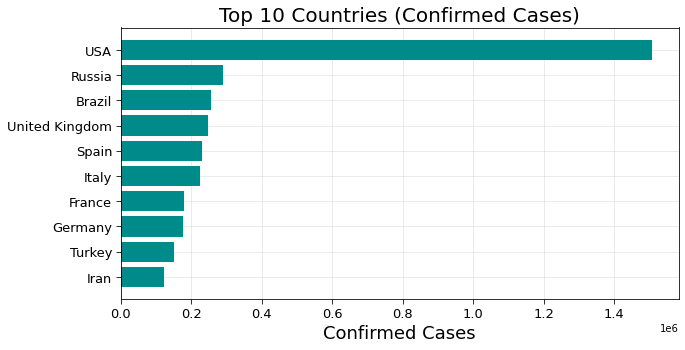

In [15]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Confirmed')["Confirmed"].index[-10:],df_countries_cases.sort_values('Confirmed')["Confirmed"].values[-10:],color="darkcyan")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 Countries (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.3)

df_countries_cases.sort_values('Confirmed').to_csv(r'countries-confirmed-cases-sorted.csv')

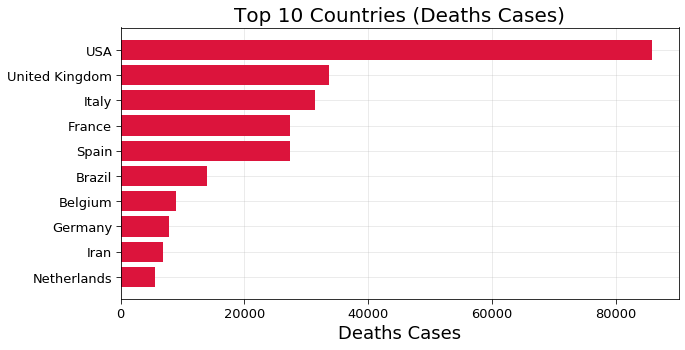

In [107]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Deaths')["Deaths"].index[-10:],df_countries_cases.sort_values('Deaths')["Deaths"].values[-10:],color="crimson")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Deaths Cases",fontsize=18)
plt.title("Top 10 Countries (Deaths Cases)",fontsize=20)
plt.grid(alpha=0.3,which='both')

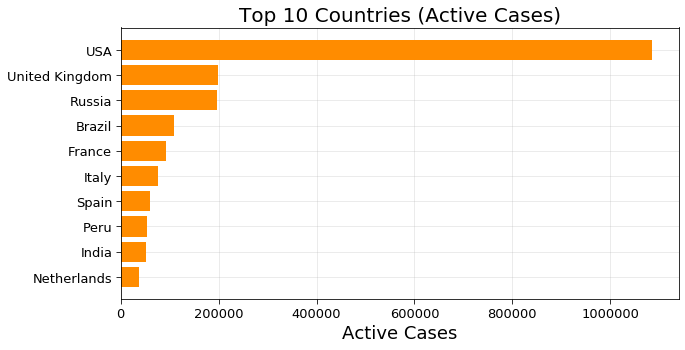

In [108]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Active')["Active"].index[-10:],df_countries_cases.sort_values('Active')["Active"].values[-10:],color="darkorange")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Active Cases",fontsize=18)
plt.title("Top 10 Countries (Active Cases)",fontsize=20)
plt.grid(alpha=0.3,which='both')

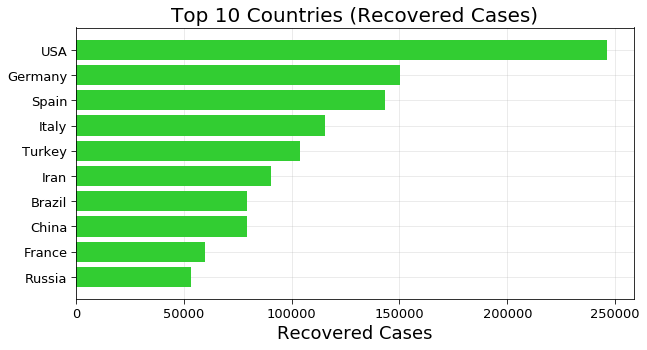

In [109]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Recovered')["Recovered"].index[-10:],df_countries_cases.sort_values('Recovered')["Recovered"].values[-10:],color="limegreen")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Recovered Cases",fontsize=18)
plt.title("Top 10 Countries (Recovered Cases)",fontsize=20)
plt.grid(alpha=0.3,which='both')

In [110]:
df_countries_cases.iloc[:,:].corr().style.background_gradient(cmap='Reds')

In [111]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [112]:
import folium

In [113]:
world_map = folium.Map(location=[10,0], tiles="cartodbpositron", zoom_start=2,max_zoom=6,min_zoom=2)
for i in range(0,len(df_confirmed)):
    folium.Circle(
        location=[df_confirmed.iloc[i]['Lat'], df_confirmed.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_confirmed.iloc[i]['country']+"</h5>"+
                    "<div style='text-align:center;'>"+str(np.nan_to_num(df_confirmed.iloc[i]['state']))+"</div>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(df_confirmed.iloc[i,-1])+"</li>"+
        "<li>Deaths:   "+str(df_deaths.iloc[i,-1])+"</li>"+
        "<li>Mortality Rate:   "+str(np.round(df_deaths.iloc[i,-1]/(df_confirmed.iloc[i,-1]+1.00001)*100,2))+"</li>"+
        "</ul>"
        ,
        radius=(int((np.log(df_confirmed.iloc[i,-1]+1.00001)))+0.2)*50000,
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(world_map)

world_map

In [114]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [115]:
import plotly.express as px

In [116]:
temp_df = pd.DataFrame(df_countries_cases['Confirmed'])
temp_df = temp_df.reset_index()
fig = px.choropleth(temp_df, locations="country",
                    color=np.log10(temp_df["Confirmed"]), # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    hover_data=["Confirmed"],
                    color_continuous_scale=px.colors.sequential.Plasma,locationmode="country names")
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Confirmed Cases Heat Map (Log Scale)")
fig.update_coloraxes(colorbar_title="Confirmed Cases(Log Scale)",colorscale="Blues")
# fig.to_image("Global Heat Map confirmed.png")
fig.show()

In [117]:
temp_df = pd.DataFrame(df_countries_cases['Deaths'])
temp_df = temp_df.reset_index()
fig = px.choropleth(temp_df, locations="country",
                    color=np.log10(temp_df["Deaths"]+1), # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    hover_data=["Deaths"],
                    color_continuous_scale=px.colors.sequential.Plasma,locationmode="country names")
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Deaths Heat Map (Log Scale)")
fig.update_coloraxes(colorbar_title="Deaths (Log Scale)",colorscale="Reds")
# fig.to_image("Global Heat Map deaths.png")
fig.show()

In [118]:
temp_df = pd.DataFrame(df_countries_cases['Recovered'])
temp_df = temp_df.reset_index()
fig = px.choropleth(temp_df, locations="country",
                    color=np.log10(temp_df.iloc[:,-1]+1), # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    hover_data=["Recovered"],
                    color_continuous_scale=px.colors.sequential.Plasma,locationmode="country names")
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Recovered Heat Map (Log Scale)")
fig.update_coloraxes(colorbar_title="Recovered",colorscale="Greens")
# fig.to_image("Global Heat Map deaths.png")
fig.show()

In [119]:
from scipy.interpolate import make_interp_spline

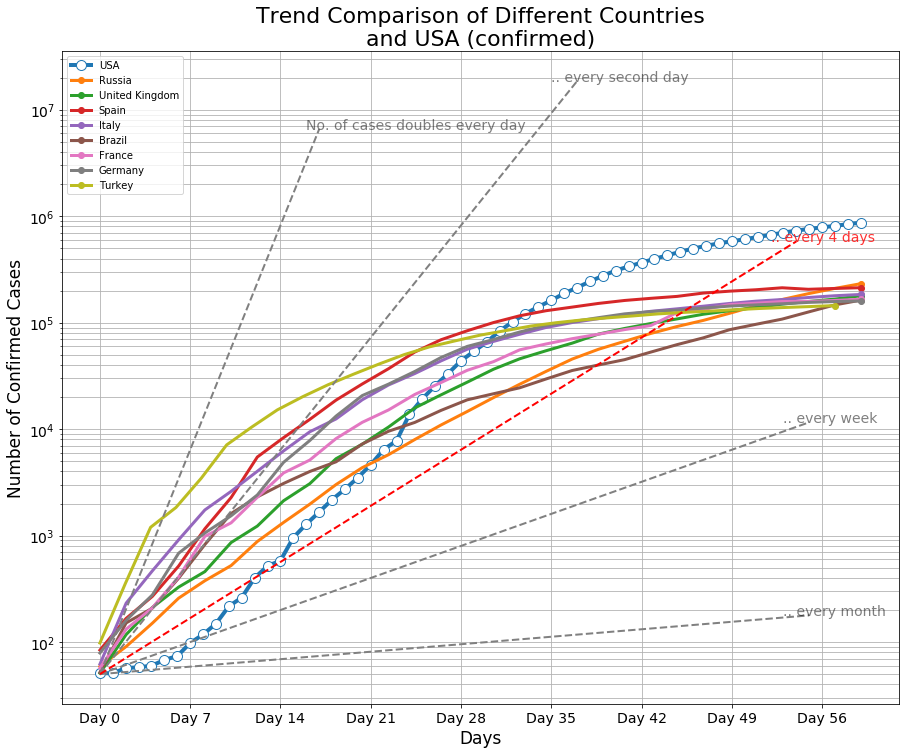

In [120]:
temp = df_confirmed.groupby('country').sum().drop(["Lat","Long"],axis =1).sort_values(df_confirmed.columns[-1], ascending= False)

threshold = 50
f = plt.figure(figsize=(15,12))
ax = f.add_subplot(111)
for i,country in enumerate(temp.index):
    if i >= 9:
        if country != "USA":
            continue
    days = 60
    t = temp.loc[temp.index== country].values[0]
    t = t[t>threshold][:days]
     
    date = np.arange(0,len(t[:days]))
    xnew = np.linspace(date.min(), date.max(), 30)
    spl = make_interp_spline(date, t, k=1)  # type: BSpline
    power_smooth = spl(xnew)
    if country != "USA":
        plt.plot(xnew,power_smooth,'-o',label = country,linewidth =3, markevery=[-1])
    else:
        marker_style = dict(linewidth=4, linestyle='-', marker='o',markersize=10, markerfacecolor='#ffffff')
        plt.plot(date,t,"-.",label = country,**marker_style)

plt.tick_params(labelsize = 14)        
plt.xticks(np.arange(0,days,7),[ "Day "+str(i) for i in range(days)][::7])     

# Reference lines 
x = np.arange(0,18)
y = 2**(x+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate("No. of cases doubles every day",(x[-2],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,int(days-22))
y = 2**(x/2+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every second day",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,int(days-4))
y = 2**(x/7+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every week",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,int(days-4))
y = 2**(x/30+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every month",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)


# India is following trend similar to doulbe the cases in 4 days but it may increase the rate 
x = np.arange(0,int(days-5))
y = 2**(x/4+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "Red")
plt.annotate(".. every 4 days",(x[-3],y[-1]),color="Red",xycoords="data",fontsize=14,alpha = 0.8)

# plot Params
plt.xlabel("Days",fontsize=17)
plt.ylabel("Number of Confirmed Cases",fontsize=17)
plt.title("Trend Comparison of Different Countries\n and USA (confirmed) ",fontsize=22)
plt.legend(loc = "upper left")
plt.yscale("log")
plt.grid(which="both")
plt.show()

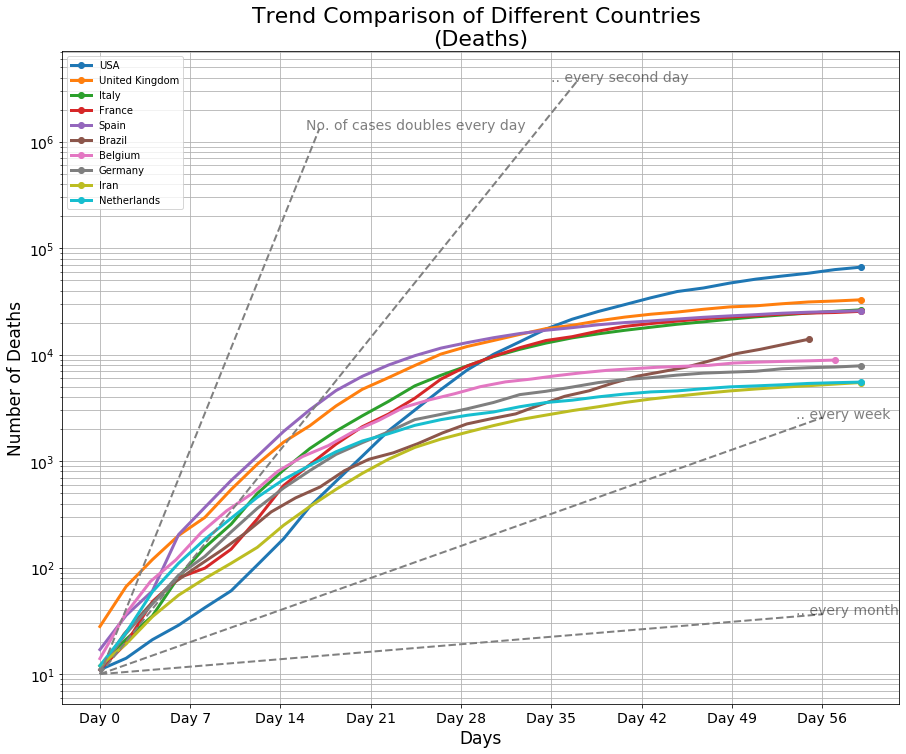

In [121]:
temp = df_deaths.groupby('country').sum().drop(["Lat","Long"],axis =1).sort_values(df_deaths.columns[-1], ascending= False)

threshold = 10
f = plt.figure(figsize=(15,12))
ax = f.add_subplot(111)
for i,country in enumerate(temp.index):
    if i >= 10:
        break
    days = 60
    t = temp.loc[temp.index== country].values[0]
    t = t[t>threshold][:days]
     
    date = np.arange(0,len(t[:days]))
    xnew = np.linspace(date.min(), date.max(), 30)
    spl = make_interp_spline(date, t, k=1)  # type: BSpline
    power_smooth = spl(xnew)
    plt.plot(xnew,power_smooth,'-o',label = country,linewidth =3, markevery=[-1])


plt.tick_params(labelsize = 14)        
plt.xticks(np.arange(0,days,7),[ "Day "+str(i) for i in range(days)][::7])     

# Reference lines 
x = np.arange(0,18)
y = 2**(x+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate("No. of cases doubles every day",(x[-2],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,days-22)
y = 2**(x/2+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every second day",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,days-3)
y = 2**(x/7+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every week",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,days-3)
y = 2**(x/30+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every month",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

# plot Params
plt.xlabel("Days",fontsize=17)
plt.ylabel("Number of Deaths",fontsize=17)
plt.title("Trend Comparison of Different Countries \n(Deaths)",fontsize=22)
plt.legend(loc = "upper left")
plt.yscale("log")
plt.grid(which="both")
plt.show()

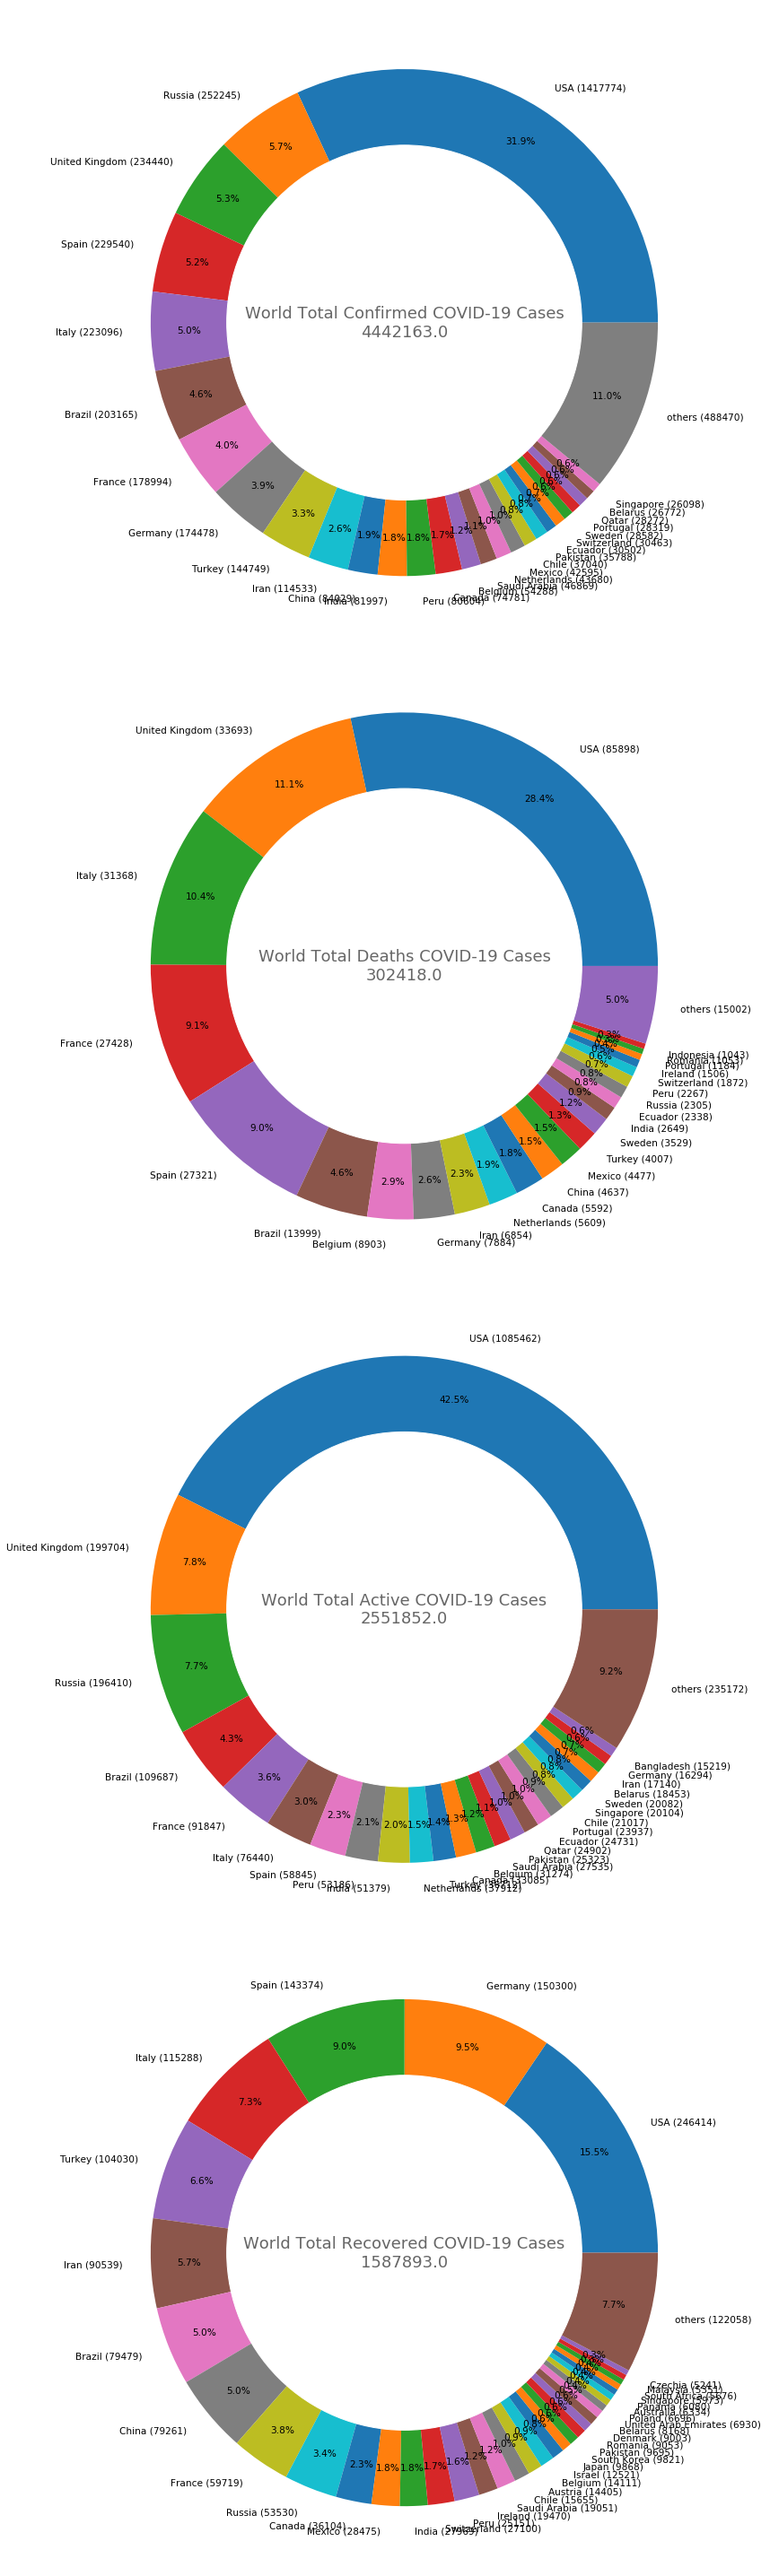

In [122]:
rows = 4
f = plt.figure(figsize=(15,10*rows))

stats = [df_covid19.loc[:,['country','Confirmed']],df_covid19.loc[:,['country','Deaths']],df_covid19.loc[:,['country','Active']],df_covid19.loc[:,['country','Recovered']]]
label = ["Confirmed","Deaths","Active","Recovered"]
threshold = [25000,1000,15000,5000]
for i, stat in enumerate(stats):
    plt.tight_layout()
    df_countries = stat.groupby(["country"]).sum()
    df_countries = df_countries.sort_values(df_countries.columns[-1],ascending= False)
    others = df_countries[df_countries[df_countries.columns[-1]] < threshold[i] ].sum()[-1]
    df_countries = df_countries[df_countries[df_countries.columns[-1]] > threshold[i]]
    df_countries = df_countries[df_countries.columns[-1]]
    df_countries["others"] = others
    labels = [df_countries.index[i] +" (" + str(int(df_countries[i])) +") "for i in range(df_countries.shape[0])]

    ax = f.add_subplot(rows,1,i+1)
    plt.pie(df_countries, labels=labels,autopct='%1.1f%%',pctdistance=0.85, labeldistance=1.1,textprops = {'fontsize':10.5})
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.text(0.5,0.5,"World Total "+label[i]+ " COVID-19 Cases\n"+str(stat.sum().values[1]), horizontalalignment='center',verticalalignment='center',transform=ax.transAxes, size=18, alpha = 0.6)


plt.show()

In [123]:
from datetime import datetime

In [124]:
date_usa = datetime.strptime(df_confirmed.columns[-1],'%m/%d/%y').strftime("%m-%d-%Y")
df_temp = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"+date_usa+".csv")
df_usa = df_temp.loc[df_temp["Country_Region"]== "US"]
df_usa = df_usa.rename(columns={"Admin2":"County"})

In [125]:
total = df_usa.sum()
total.name = "Total"
pd.DataFrame(total).transpose().loc[:,["Confirmed","Deaths"]].style.background_gradient(cmap='Purples',axis=1)

In [126]:
df_usa.loc[:,["Confirmed","Deaths","Province_State"]].groupby(["Province_State"]).sum().sort_values("Confirmed",ascending=False).style.background_gradient(cmap='Blues',subset=["Confirmed"]).background_gradient(cmap='Reds',subset=["Deaths"])

In [127]:
df_usa.loc[:,["Province_State","Confirmed","Deaths","County"]].sort_values("Confirmed",ascending=False).set_index("County")[:10].style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])

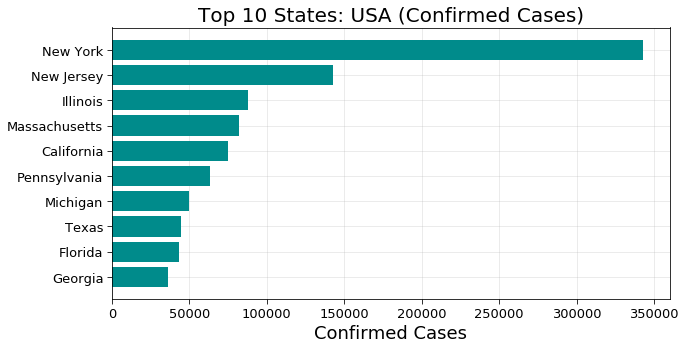

In [128]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_usa.groupby(["Province_State"]).sum().sort_values('Confirmed')["Confirmed"].index[-10:],df_usa.groupby(["Province_State"]).sum().sort_values('Confirmed')["Confirmed"].values[-10:],color="darkcyan")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 States: USA (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.3)

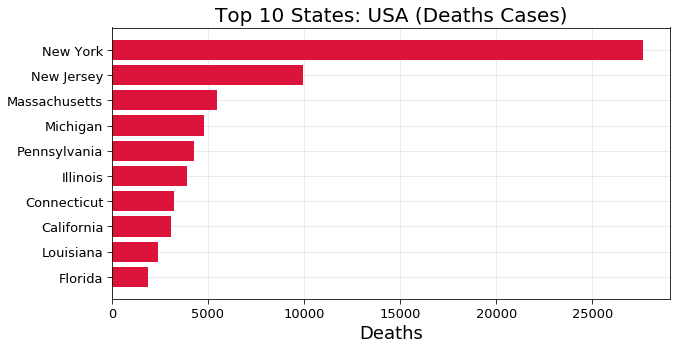

In [129]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_usa.groupby(["Province_State"]).sum().sort_values('Deaths')["Deaths"].index[-10:],df_usa.groupby(["Province_State"]).sum().sort_values('Deaths')["Deaths"].values[-10:],color="crimson")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Deaths",fontsize=18)
plt.title("Top 10 States: USA (Deaths Cases)",fontsize=20)
plt.grid(alpha=0.3)

In [130]:
df_usa = df_usa.replace(np.nan, 0, regex=True)
usa = folium.Map(location=[37, -102], zoom_start=4,max_zoom=9,min_zoom=4)
for i in np.int32(np.asarray(df_usa[df_usa['Confirmed'] > 0].index)):
    folium.Circle(
        location=[df_usa.loc[i]['Lat'], df_usa.loc[i]['Long_']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_usa.loc[i]['Province_State']+"</h5>"+
                    "<div style='text-align:center;'>"+str(np.nan_to_num(df_usa.loc[i]['County']))+"</div>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(df_usa.loc[i]['Confirmed'])+"</li>"+
        "<li>Active:   "+str(df_usa.loc[i]['Active'])+"</li>"+
        "<li>Recovered:   "+str(df_usa.loc[i]['Recovered'])+"</li>"+       
        "<li>Deaths:   "+str(df_usa.loc[i]['Deaths'])+"</li>"+
        "<li>Mortality Rate:   "+str(np.round(df_usa.loc[i]['Deaths']/(df_usa.loc[i]['Confirmed']+1)*100,2))+"</li>"+
        "</ul>"
        ,
        radius=int((np.log2(df_usa.loc[i]['Confirmed']+1))*6000),
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(usa)

usa

In [131]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [132]:
import requests

In [133]:
state_geo = requests.get('https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json').json()
county_geo = requests.get('https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us_counties_20m_topo.json').json()

In [134]:
data_temp = df_usa.groupby(["Province_State"]).sum().reset_index().drop(["Lat","Long_"],axis=1)
data_temp["Confirmed_log"] = np.log10(data_temp["Confirmed"]+1)
bins = list(data_temp['Confirmed_log'].quantile([0, 0.25, 0.5, 0.75,0.95 ,1]))
m = folium.Map(location=[37, -102], zoom_start=4,max_zoom=6,min_zoom=3)
 
# Add the color for the chloropleth:
folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data = data_temp,
    columns=['Province_State', 'Confirmed_log'],
    key_on='feature.properties.name',
    fill_color='Reds',
    fill_opacity=0.7,
    line_opacity=0.2,
    bins = bins,
    reset=True,
    legend_name='Confirmed cases log (10^x)'
).add_to(m)
folium.LayerControl().add_to(m)

legend_html = "<div style='padding:10px;background-color:rgba(255,255,255,0.5);position:fixed;bottom:20px;left:20px;z-index:1000'>"
legend_html += "<div style='width:100%;text-align:center;'><h4>Index for Legend</h4></div><hr style='border-top-color: rgba(25,25,25,0.5);'>"
legend_html += "<ul style='margin:0;padding:0;color: #555;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"
for i in bins:
    legend_html += "<li style='margin:0;padding:0;line-height: 0;'>Value "+str(np.round(i,2))+" : "+str(int(10**i)-1)+"</li><br>"
legend_html += "</ul></div>"
m.get_root().html.add_child(folium.Element(legend_html))
m

In [135]:
pip install branca

Note: you may need to restart the kernel to use updated packages.


In [136]:
import branca

In [137]:
data_temp = df_usa.groupby(["FIPS"]).sum().reset_index().drop(["Lat","Long_"],axis=1)
data_temp["Confirmed_log"] = np.log10(data_temp["Confirmed"]+1)

df_usa_series = data_temp.set_index('FIPS')['Confirmed_log']
colorscale = branca.colormap.linear.Reds_09.scale(0,data_temp["Confirmed_log"].max()-1)
# print(df_usa_series.max())
def style_function(feature):
    employed = df_usa_series.get(int(feature['id'][-5:]), 0)
    return {
        'fillOpacity': 0.5,
        'weight': 0,
        'fillColor': '#black' if employed is None else colorscale(employed)
    }


m = folium.Map(
    location=[37, -102],
    tiles='cartodbpositron',
    zoom_start=4,
    min_zoom=3,
    max_zoom=7
)

folium.TopoJson(
    county_geo,
    'objects.us_counties_20m',
    style_function=style_function
).add_to(m)
m